# **Import flickr8k dataset**

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"lduncukit","key":"d57fa9a7563aec1d7c76b7e9b1641f65"}'}

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
  
od.download("https://www.kaggle.com/adityajn105/flickr8k/download")

Skipping, found downloaded files in "./flickr8k" (use force=True to force download)


# **Preprocess**

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
# Set the paths to the image and caption files
image_dir = '/content/flickr8k/Images'
caption_file = '/content/flickr8k/captions.txt'

In [ ]:
# Load the ResNet50 model
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
# Define a function to extract image features using ResNet50
def extract_features(image_path):
    # Load the image and resize it to (224, 224)
    img = Image.open(image_path)
    img = img.resize((224, 224))
    # Preprocess the image
    img_array = np.array(img)
    img_array = preprocess_input(img_array)
    # Add an extra dimension to the image array
    img_array = np.expand_dims(img_array, axis=0)
    # Use the ResNet50 model to extract the features
    features = resnet.predict(img_array)
    # Flatten the features to a 1-dimensional array
    features = features.flatten()
    return features

In [ ]:

import time

In [ ]:
def load_captions(caption_file):
    captions = {}
    with open(caption_file, 'r') as f:
        for line in f:
            tokens = line.strip().split(',')
            if len(tokens) >= 2:
                img_file, caption = tokens[0], tokens[1]
                img_id = os.path.splitext(img_file)[0]
                if img_id not in captions:
                    captions[img_id] = []
                captions[img_id].append(caption)
    return captions


In [ ]:
# Extract the image features and load the captions
image_features = {}
captions = load_captions(caption_file)
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)
    start_time = time.time()
    features = extract_features(img_path)
    end_time = time.time()
    img_id = os.path.splitext(img_file)[0]
    image_features[img_id] = features

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 [==============================] - 0s 145ms/step


In [ ]:
elapsed_time = end_time - start_time
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:0.20615243911743164[sec]


In [ ]:
num_images_with_captions = len([img_id for img_id in image_features.keys() if img_id in captions])
print("Number of images with captions:", num_images_with_captions)


Number of images with captions: 8091


In [ ]:
import random
import matplotlib.pyplot as plt

def generate_caption():
  # Choose a random image ID and its features
  img_id = random.choice(list(image_features.keys()))
  features = image_features[img_id]

  # Choose a random caption for the image
  caption = random.choice(captions[img_id])

  # Load and show the image
  img_path = os.path.join(image_dir, img_id + '.jpg')
  img = Image.open(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.title(caption)
  plt.show()


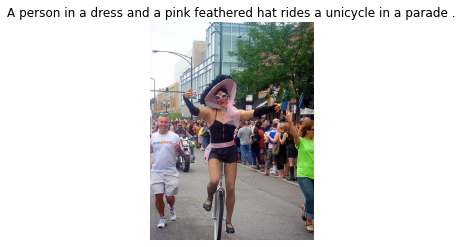

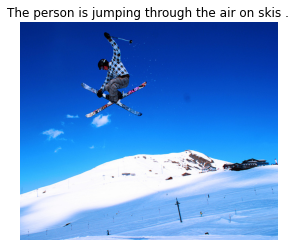

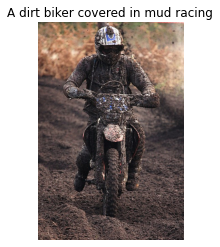

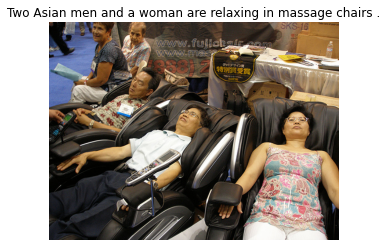

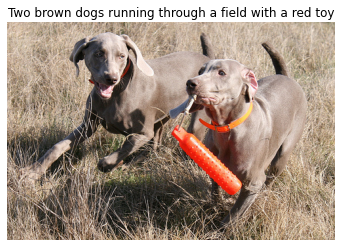

In [ ]:
for i in range(5):
    generate_caption()